In [253]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

data = sns.load_dataset("diamonds")
data.head(30)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [254]:
data.clarity.value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [255]:
import plotly.express as px

fig = px.scatter_3d(data, x = 'x', y = 'y', z='z', color = 'clarity')
fig.show()

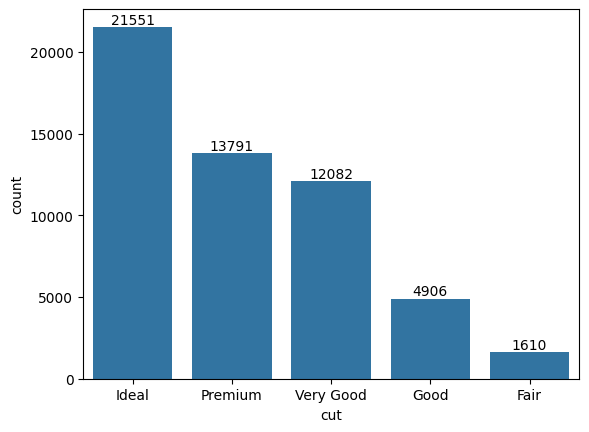

In [256]:
ax = sns.countplot(data, x='cut')
ax.bar_label(ax.containers[0])
plt.show()

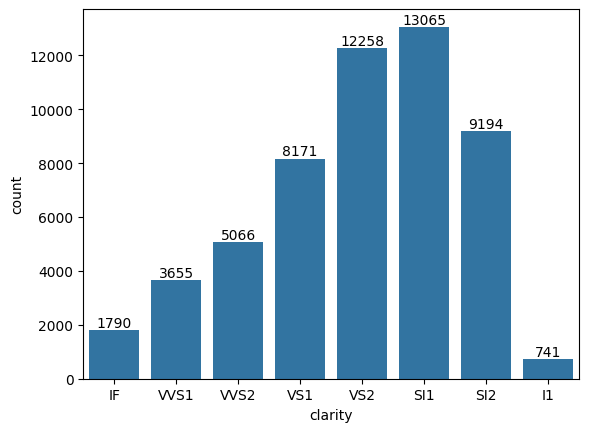

In [257]:
ax = sns.countplot(data, x='clarity')
ax.bar_label(ax.containers[0])
plt.show()

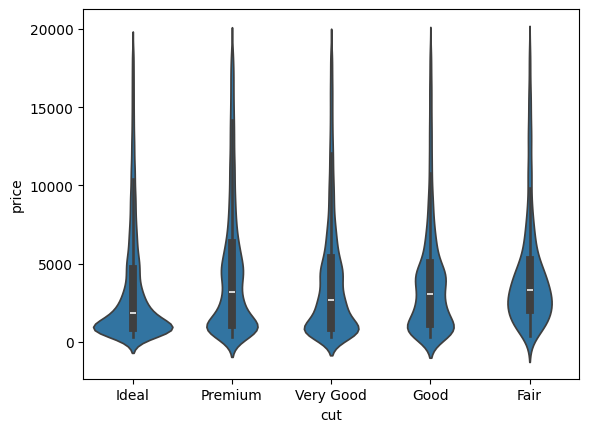

In [258]:
sns.violinplot(data, x='cut', y='price');

In [259]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [260]:
#data encoding
data_cut = pd.get_dummies(data['cut'], dtype='int', drop_first=True)
data_color = pd.get_dummies(data['color'], dtype='int', drop_first=True)

In [261]:
data_cut

,Premium,Very Good,Good,Fair
0,0,0,0,0
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
53935,0,0,0,0
53936,0,0,1,0
53937,0,1,0,0
53938,1,0,0,0


In [262]:
#Join data and remove other columns
data.drop(['cut', 'color'], axis=1, inplace=True)
data.head()

,carat,clarity,depth,table,price,x,y,z
0,0.23,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,SI2,63.3,58.0,335,4.34,4.35,2.75


In [263]:
#Merge
data = pd.concat([data, data_cut, data_color], axis=1)
data.head()


,carat,clarity,depth,table,price,x,y,z,Premium,Very Good,Good,Fair,E,F,G,H,I,J
0,0.23,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0,0,0,1,0,0,0,0,0
1,0.21,SI1,59.8,61.0,326,3.89,3.84,2.31,1,0,0,0,1,0,0,0,0,0
2,0.23,VS1,56.9,65.0,327,4.05,4.07,2.31,0,0,1,0,1,0,0,0,0,0
3,0.29,VS2,62.4,58.0,334,4.20,4.23,2.63,1,0,0,0,0,0,0,0,1,0
4,0.31,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0,1,0,0,0,0,0,0,1


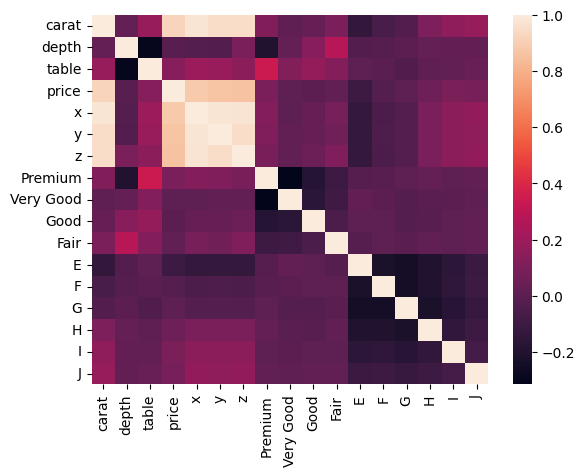

In [264]:
#Chekc if data is missing any values
sns.heatmap(data.corr(numeric_only=True));

In [265]:
data.columns

Index(['carat', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z', 'Premium',
       'Very Good', 'Good', 'Fair', 'E', 'F', 'G', 'H', 'I', 'J'],
      dtype='object')

In [266]:
#Classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   carat      53940 non-null  float64 
 1   clarity    53940 non-null  category
 2   depth      53940 non-null  float64 
 3   table      53940 non-null  float64 
 4   price      53940 non-null  int64   
 5   x          53940 non-null  float64 
 6   y          53940 non-null  float64 
 7   z          53940 non-null  float64 
 8   Premium    53940 non-null  int64   
 9   Very Good  53940 non-null  int64   
 10  Good       53940 non-null  int64   
 11  Fair       53940 non-null  int64   
 12  E          53940 non-null  int64   
 13  F          53940 non-null  int64   
 14  G          53940 non-null  int64   
 15  H          53940 non-null  int64   
 16  I          53940 non-null  int64   
 17  J          53940 non-null  int64   
dtypes: category(1), float64(6), int64(11)
memory usage: 7.0 MB


In [268]:
X = data[['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'Premium',
       'Very Good', 'Good', 'Fair', 'E', 'F', 'G', 'H', 'I', 'J']]
y = data['clarity']

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)
print(X_test.size)
print(y_test.size)


733584
43152
183396
10788


In [270]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best cross-validation accuracy for Random Forest: {grid_search_rf.best_score_:.4f}")

y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
print(f"Classification Report for Random Forest:\n{classification_report(y_test, y_pred_rf)}")

/opt/anaconda3/envs/DataScienceUpdated/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Best parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy for Random Forest: 0.6542
Classification Report for Random Forest:
              precision    recall  f1-score   support

          I1       0.92      0.61      0.74       152
          IF       0.75      0.58      0.65       363
         SI1       0.65      0.72      0.69      2622
         SI2       0.74      0.78      0.76      1812
         VS1       0.58      0.53      0.55      1619
         VS2       0.65      0.66      0.65      2510
        VVS1       0.64      0.56      0.59       703
        VVS2       0.62      0.58      0.60      1007

    accuracy                           0.66     10788
   macro avg       0.69      0.63      0.65     10788
weighted avg       0.66      0.66      0.66     10788

